# Métodos numéricos II
A lo largo de esta UEA se analizaron diversos problemas de distintas ramas de las matématicas con el fin de su resolución numérica computacionalmente.

Inicialmente importamos las bibliotecas a utilizar:

In [14]:
using DataFrames #Utilizaremos los Dataframes para realizar tablas con el fin de comparar resultados
using Printf #Utilizaremos esta biblioteca para dar formato apropiado

## Derivación numérica 

Comenzamos implementando las diversas formas de aproximar la derivada numericamente, existen los siguientes métodos de derivación numérica:

Inicialmente existen las aproximaciones derivadas de la aproximación a la derivada como límite:
$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$

$$
f'(x) \approx \frac{f(x) - f(x - h)}{h}
$$
Después plantearemos las fórmulas de 3 puntos:
$$
f'(x) \approx \frac{-3.0 \cdot f(x) + 4.0 \cdot f(x + h) - f(x + 2.0 \cdot h)}{2.0 \cdot h}
$$

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2.0 \cdot h}
$$
Finalmente las aproximaciones de 5 puntos:
$$
f'(x) \approx \frac{f(x - 2.0 \cdot h) - 8.0 \cdot f(x - h) + 8.0 \cdot f(x + h) - f(x + 2.0 \cdot h)}{12.0 \cdot h}
$$

$$
f'(x) \approx \frac{-25.0 \cdot f(x) + 48.0 \cdot f(x + h) - 36.0 \cdot f(x + 2.0 \cdot h) + 16.0 \cdot f(x + 3.0 \cdot h) - 3.0 \cdot f(x + 4.0 \cdot h)}{12.0 \cdot h}
$$




In [15]:
function diff_forwards(f, x, h)
    #Derivada aproximada por la definición hacía adelante
    return (f(x + h) - f(x)) / h
end

function diff_backwards(f, x, h)
    #Derivada aproximada por la definición hacía atrás
    return (f(x) - f(x - h)) / h
end

function diff_final_three_points(f, x, h)
    #Derivada aproximada por tres puntos recorridos 
    return (-3.0 * f(x) + 4.0 * f(x + h) - f(x + 2.0 * h)) / (2.0 * h)
end

function diff_medium_three_points(f, x, h)
    #Derivada aproximada por tres puntos medios 
    return (f(x + h) - f(x - h)) / (2.0 * h)
end

function diff_medium_five_points(f, x, h)
    #Derivada aproximada por cinco puntos medios 
    return (f(x - 2.0 * h) - 8.0 * f(x - h) + 8.0 * f(x + h) - f(x + 2.0 * h)) / (12.0 * h)
end

function diff_final_five_points(f, x, h)
    #Derivada aproximada por cinco puntos finales 
    return (-25.0 * f(x) + 48.0 * f(x + h) - 36.0 * f(x + 2.0 * h)
        + 16.0 * f(x + 3.0 * h) - 3.0 * f(x + 4.0 * h)) / (12.0 * h)
end


function tabulate_derivative(f, x_0, h_values, method, derivative_func=nothing)
    #Utilizarémos esta función para tabular distintos resultados
    data = DataFrame(
        h = Float64[],
        Approximation = Float64[],
        cota = Float64[],
        Error = Float64[]
    )
    #Para cada valor de h calculamos la derivada numérica con el método especificado
    for h in h_values
        approximation, cota, error = 0.0, 0.0, 0.0
        #Para los primeros dos métodos agregamos un valor que representa una cota para el error de las aproximaciones numéricas
        if method == "diff_forwards"
            approximation = diff_forwards(f, x_0, h)
            cota = abs(h) / (2.0 * (x_0 * x_0))
            if derivative_func !== nothing
                error = abs(derivative_func(x_0) - approximation)
            end
        elseif method == "diff_backwards"
            approximation = diff_backwards(f, x_0, h)
            cota = abs(h) / (2.0 * (x_0 - h) * (x_0 - h))
            if derivative_func !== nothing
                error = abs(derivative_func(x_0) - approximation)
            end
        elseif method == "diff_final_three_points"
            approximation = diff_final_three_points(f, x_0, h)
            cota = abs(h) / (3.0 * (x_0 * x_0))
            if derivative_func !== nothing
                error = abs(derivative_func(x_0) - approximation)
            end
        elseif method == "diff_medium_three_points"
            approximation = diff_medium_three_points(f, x_0, h)
            cota = (2.0 * h * h) / (6.0 * (x_0 - h)^3)
            if derivative_func !== nothing
                error = abs(derivative_func(x_0) - approximation)
            end
        elseif method == "diff_medium_five_points"
            approximation = diff_medium_five_points(f, x_0, h)
            if derivative_func !== nothing
                error = abs(derivative_func(x_0) - approximation)
            end
        elseif method == "diff_final_five_points"
            approximation = diff_final_five_points(f, x_0, h)
            if derivative_func !== nothing
                error = abs(derivative_func(x_0) - approximation)
            end
        else
            error("Invalid method: $method")
        end

        push!(data, (h, approximation, cota, error))
    end

    println("Derivative table created.")
    return data
end

tabulate_derivative (generic function with 2 methods)

Consideremos la función logaritmo natural, sabemos lo siguiente:
  $$f(x) = ln(x)$$

La derivada respecto a $x$ es la siguiente:

$$f(x) = \frac{1}{x}$$

In [16]:
#Implementamos la función de la cuál queremos aproximar la derivada y la derivada para comparar resultados
function f(x)
    return log(x)
end

function f_prima(x)
    return 1/x
end

f_prima (generic function with 1 method)

In [17]:
#Generamos una lista de valores para h
h_s = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
#Métodos de diferenciación a utilizar
methods = [
    "diff_forwards",
    "diff_backwards",
    "diff_final_three_points",
    "diff_medium_three_points",
    "diff_medium_five_points",
    "diff_final_five_points"
]
#A través de un ciclo aplicamos todos los métodos
for method in methods
    resultados = tabulate_derivative(f, 1.8, h_s, method, f_prima)
    println("Resultados del método: $method")
    display(resultados)
end

Derivative table created.
Resultados del método: diff_forwards


Row,h,Approximation,cota,Error
,Float64,Float64,Float64,Float64
1,0.1,0.540672,0.0154321,0.0148833
2,0.01,0.554018,0.00154321,0.00153752
3,0.001,0.555401,0.000154321,0.000154264
4,0.0001,0.55554,1.54321e-5,1.54315e-5
5,1.0e-5,0.555554,1.54321e-6,1.54321e-6
6,1.0e-6,0.555555,1.54321e-7,1.54428e-7


Derivative table created.
Resultados del método: diff_backwards


Row,h,Approximation,cota,Error
,Float64,Float64,Float64,Float64
1,0.1,0.571584,0.017301,0.0160286
2,0.01,0.557105,0.0015605,0.00154895
3,0.001,0.55571,0.000154493,0.000154378
4,0.0001,0.555571,1.54338e-5,1.54327e-5
5,1.0e-5,0.555557,1.54323e-6,1.54322e-6
6,1.0e-6,0.555556,1.54321e-7,1.54325e-7


Derivative table created.
Resultados del método: diff_final_three_points


Row,h,Approximation,cota,Error
,Float64,Float64,Float64,Float64
1,0.1,0.554542,0.0102881,0.00101371
2,0.01,0.555544,0.00102881,1.12898e-5
3,0.001,0.555555,0.000102881,1.14169e-7
4,0.0001,0.555556,1.02881e-5,1.14433e-9
5,1.0e-5,0.555556,1.02881e-6,1.30138e-11
6,1.0e-6,0.555556,1.02881e-7,2.18405e-10


Derivative table created.
Resultados del método: diff_medium_three_points


Row,h,Approximation,cota,Error
,Float64,Float64,Float64,Float64
1,0.1,0.556128,0.000678472,0.00057262
2,0.01,0.555561,5.81192e-6,5.7157e-6
3,0.001,0.555556,5.72513e-8,5.71559e-8
4,0.0001,0.555556,5.71654e-10,5.71519e-10
5,1.0e-5,0.555556,5.71569e-12,9.19065e-12
6,1.0e-6,0.555556,5.7156e-14,5.18716e-11


Derivative table created.
Resultados del método: diff_medium_five_points


Row,h,Approximation,cota,Error
,Float64,Float64,Float64,Float64
1,0.1,0.555551,0.0,4.28092e-6
2,0.01,0.555556,0.0,4.23424e-10
3,0.001,0.555556,0.0,1.2601e-13
4,0.0001,0.555556,0.0,6.12843e-14
5,1.0e-5,0.555556,0.0,4.56468e-12
6,1.0e-6,0.555556,0.0,7.03754e-11


Derivative table created.
Resultados del método: diff_final_five_points


Row,h,Approximation,cota,Error
,Float64,Float64,Float64,Float64
1,0.1,0.555539,0.0,1.65154e-5
2,0.01,0.555556,0.0,2.42621e-9
3,0.001,0.555556,0.0,4.12781e-13
4,0.0001,0.555556,0.0,2.65177e-12
5,1.0e-5,0.555556,0.0,7.34024e-12
6,1.0e-6,0.555556,0.0,5.14465e-10


Notemos que la aproximación numérica es bastante competente con un error mínimo a partir del tercer valor de $h$

## Integración numérica 

Para la integración numérica poseemos las siguientes aproximaciones, comenzaremos con las aproximaciones cerradas:
$$
\int_a^b f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]
$$

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{6} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]
$$

$$
\int_a^b f(x) \, dx \approx \frac{3(b - a)}{8} \left[ f(a) + 3f\left(a + \frac{b - a}{3}\right) + 3f\left(a + \frac{2(b - a)}{3}\right) + f(b) \right]
$$

$$
\int_a^b f(x) \, dx \approx \frac{2(b - a)}{45} \left[ 7f(a) + 32f\left(a + \frac{b - a}{4}\right) + 12f\left(a + \frac{b - a}{2}\right) + 32f\left(a + \frac{3(b - a)}{4}\right) + 7f(b) \right]
$$

Ahora a continuación se encuentran las aproximaciones abiertas:



$$
\int_a^b f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{2} \left[ f\left(a + \frac{b - a}{3}\right) + f\left(a + \frac{2(b - a)}{3}\right) \right]
$$

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{3} \left[ 2f\left(a + \frac{b - a}{4}\right) - f\left(a + \frac{b - a}{2}\right) + 2f\left(a + \frac{3(b - a)}{4}\right) \right]
$$

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{24} \left[ 11f\left(a + \frac{b - a}{5}\right) + f\left(a + \frac{2(b - a)}{5}\right) + f\left(a + \frac{3(b - a)}{5}\right) + 11f\left(a + \frac{4(b - a)}{5}\right) \right]
$$


In [18]:
function integrate_trapezoid(lambda, a, b)
    delta = b - a
    return (delta / 2.0) * (lambda(a) + lambda(a + delta))
end

function integrate_simpson(lambda, a, b)
    delta = (b - a) / 2.0
    return (delta / 3.0) * (lambda(a) + 4.0 * lambda((a + b) / 2.0) + lambda(b))
end

function integrate_three_eights(lambda, a, b)
    delta = (b - a) / 3.0
    return (3.0 * delta / 8.0) *
        (lambda(a) + 3.0 * lambda(a + delta) + 3.0 * lambda(a + 2.0 * delta) + lambda(b))
end

function integrate_boole(lambda, a, b)
    delta = (b - a) / 4.0
    return (4.0 * delta / 90.0) *
        (7.0 * lambda(a)
            + 32.0 * lambda(a + delta)
            + 12.0 * lambda(a + 2.0 * delta)
            + 32.0 * lambda(a + 3.0 * delta)
            + 7.0 * lambda(b))
end

function integrate_mid_point(lambda, a, b)
    return (b - a) * lambda((a + b) / 2.0)
end

function integrate_i_1_a(lambda, a, b)
    delta = (b - a) / 3.0
    return (b - a) / 2.0 * (lambda(a + delta) + lambda(a + 2.0 * delta))
end

function integrate_i_2_a(lambda, a, b)
    delta = (b - a) / 4.0
    return (b - a) / 3.0 * (2.0 * lambda(a + delta) - lambda(a + 2.0 * delta) + 2.0 * lambda(a + 3.0 * delta))
end

function integrate_i_3_a(lambda, a, b)
    delta = (b - a) / 5.0
    return (b - a) / 24.0 *
        (11.0 * lambda(a + delta)
            + lambda(a + 2.0 * delta)
            + lambda(a + 3.0 * delta)
            + 11.0 * lambda(a + 4.0 * delta))
end

integrate_i_3_a (generic function with 1 method)

Consideremos el problema de efectuar la siguiente integral:
$$
f(x)=x^2
$$
Sabemos del cálculo elemental lo siguiente:
$$
\int_0^1 x^2 \, dx = \left[ \frac{x^3}{3} \right]_0^1 = \frac{1^3}{3} - \frac{0^3}{3} = \frac{1}{3}
$$
Dicha integral se ve representada como sigue geometricamente:

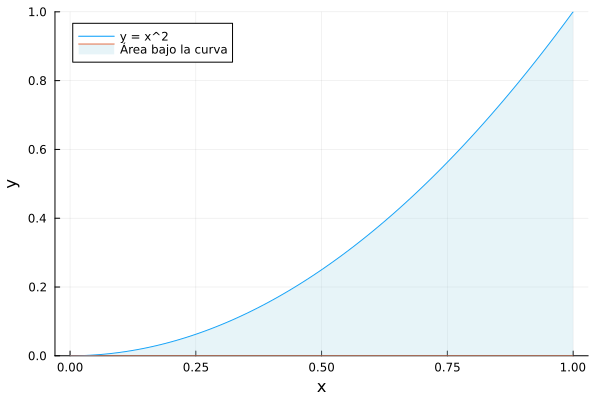

In [19]:
using Plots
f(x) = x^2
x_values = 0:0.01:1
y_values = f.(x_values)
plot(x_values, y_values, label="y = x^2", xlabel="x", ylabel="y", ylims=(0,1), legend=:topleft)
plot!(x_values, zeros(length(x_values)), fillrange=y_values, fillalpha=0.3, fillcolor=:lightblue, label="Área bajo la curva")



Si aplicamos los métodos implementados anteriormente obtenemos los siguientes resultados:

In [20]:
f(x) = x^2
a = 0
b = 1
result_trapezoid = integrate_trapezoid(f, a, b)
result_simpson = integrate_simpson(f, a, b)
result_three_eights = integrate_three_eights(f, a, b)
result_boole = integrate_boole(f, a, b)
result_mid_point = integrate_mid_point(f, a, b)
result_i_1_a = integrate_i_1_a(f, a, b)
result_i_2_a = integrate_i_2_a(f, a, b)
result_i_3_a = integrate_i_3_a(f, a, b)
println("Trapezoid Rule: ", result_trapezoid)
println("Simpson's Rule: ", result_simpson)
println("Three-Eighths Rule: ", result_three_eights)
println("Boole's Rule: ", result_boole)
println("Mid-Point Rule: ", result_mid_point)
println("I_1_a Rule: ", result_i_1_a)
println("I_2_a Rule: ", result_i_2_a)
println("I_3_a Rule: ", result_i_3_a)

Trapezoid Rule: 0.5
Simpson's Rule: 0.3333333333333333
Three-Eighths Rule: 0.3333333333333333
Boole's Rule: 0.33333333333333337
Mid-Point Rule: 0.25
I_1_a Rule: 0.2777777777777778
I_2_a Rule: 0.3333333333333333
I_3_a Rule: 0.33333333333333337


## Integración compuesta
Ahora toca analizar las distintas formulas de integración compuesta,las mostramos a continuación:


In [27]:
function composed_trapezoid(f, a, b, n)
    h = (b - a) / n
    result = (f(a) + f(b)) / 2
    
    for i = 1:n-1
        result += f(a + i*h)
    end
    
    result *= h
    return result
end
using DataFrames

function generar_tabla_integracion(n_values,f,a,b,metodo,integral_value=nothing)
    df = DataFrame(n = Int[], h = Float64[], integral_value = Float64[], error = Float64[], error_ratio = Float64[])
    
    previous_error = nothing

    for n in n_values
        h = (b-a) / n
        integral_approx = metodo(f,a,b,n)
        push!(df, (n, h, integral_approx, NaN, NaN))
        
        if integral_value !== nothing
            error = abs(integral_approx - integral_value)
            error_ratio = NaN
            
            if previous_error !== nothing
                error_ratio = error/abs(metodo(f,a,b,2*n) - integral_value)
            end
            
            df.error[end] = error
            df.error_ratio[end] = error_ratio
            
            previous_error = error
        end
    end
    
    return df
end


generar_tabla_integracion (generic function with 2 methods)

In [28]:
f(x) = sin(x)
a = 0
b = pi
n = 2
result = composed_trapezoid(f, a, b, n)
println("Approximate integral: ", result)


Approximate integral: 1.5707963267948966


In [29]:
generar_tabla_integracion([1,2,3,4,5,6,16,32,64,128],f,0,pi,composed_trapezoid,2)

Row,n,h,integral_value,error,error_ratio
,Int64,Float64,Float64,Float64,Float64
1,1,3.14159,0.0,2.0,NaN
2,2,1.5708,1.5708,0.429204,4.13168
3,3,1.0472,1.8138,0.186201,4.05641
4,4,0.785398,1.89612,0.103881,4.03134
5,5,0.628319,1.93377,0.0662344,4.01994
6,6,0.523599,1.9541,0.0459028,4.0138
7,16,0.19635,1.99357,0.00642966,4.00193
8,32,0.0981748,1.99839,0.00160664,4.00048
9,64,0.0490874,1.9996,0.000401611,4.00012


In [30]:
function composed_simpson(f, a, b, n)
    if n % 2 != 0
        error("Number of subintervals (n) must be even for Simpson's rule.")
    end
    h = (b - a) / n
    result = f(a) + f(b)
    for i = 1:n-1
        x_i = a + i*h
        result += 4 * f(x_i) * (i % 2) + 2 * f(x_i) * (1 - i % 2)
    end
    result *= h / 3
    return result
end

composed_simpson (generic function with 1 method)

In [31]:
composed_simpson(f,0,pi,128)

2.000000004032258

In [51]:
f(x) = sin(x)
generar_tabla_integracion([2,4,8,16,32,64,128],f,0,pi,composed_simpson,2)

Row,n,h,integral_value,error,error_ratio
,Int64,Float64,Float64,Float64,Float64
1,2,1.5708,2.0944,0.0943951,NaN
2,4,0.785398,2.00456,0.00455975,20.7018
3,8,0.392699,2.00027,0.00026917,16.9401
4,16,0.19635,2.00002,1.6591e-5,16.2238
5,32,0.0981748,2.0,1.03337e-6,16.0553
6,64,0.0490874,2.0,6.453e-8,16.0138
7,128,0.0245437,2.0,4.03226e-9,16.0034


In [84]:
function composed_midpoint(f, a, b, n)
    h = (b - a) / n
    result = 0.0
    
    for i = 0:n-1
        x_i = a + (h/2.0) + i * h
        result += f(x_i)
    end
    
    result *= h
    return result
end



composed_midpoint (generic function with 1 method)

In [85]:
composed_midpoint(f,0,pi,2)

2.221441469079183

In [86]:
generar_tabla_integracion([2,4,8,16,32,64,128],f,0,pi,composed_midpoint,2)

Row,n,h,integral_value,error,error_ratio
,Int64,Float64,Float64,Float64,Float64
1,2,1.5708,2.22144,0.221441,NaN
2,4,0.785398,2.05234,0.0523443,4.23048
3,8,0.392699,2.01291,0.0129091,4.05484
4,16,0.19635,2.00322,0.00321638,4.01355
5,32,0.0981748,2.0008,0.000803416,4.00338
6,64,0.0490874,2.0002,0.000200812,4.00084
7,128,0.0245437,2.00005,5.02003e-5,4.00021


## Cuadraturas Gaussianas

In [2]:
function gaussian_quadrature_order_1(f, a, b)
    t1 = 0
    w1 = 2 * (b - a) / 2
    
    result = w1 * f((b - a)/2 * t1 + (a + b)/2)
    return result
end

a = 0
b = 1
f(x) = x^2

result_order_1 = gaussian_quadrature_order_1(f, a, b)
println("Result (Order 1): ", result_order_1)


Result (Order 1): 0.25


In [6]:
function gaussian_quadrature_order_2(f, a, b)
    t1 = -1/sqrt(3)
    t2 = 1/sqrt(3)
    w1 = w2 = (b - a) / 2
    
    result = w1 * f((b - a)/2 * t1 + (a + b)/2) + w2 * f((b - a)/2 * t2 + (a + b)/2)
    return result
end
f(x)=10*x^3+2*x^2+x-5
a=0
b=10
result_order_2 = gaussian_quadrature_order_2(f, a, b)
println("Result (Order 2): ", result_order_2)


Result (Order 2): 25666.666666666668


In [4]:
function gaussian_quadrature_order_3(f, a, b)
    t1 = -sqrt(3/5)
    t2 = 0
    t3 = sqrt(3/5)
    w1 = w3 = 5/9 * (b - a) / 2
    w2 = 8/9 * (b - a) / 2
    
    result = w1 * f((b - a)/2 * t1 + (a + b)/2) + w2 * f((b - a)/2 * t2 + (a + b)/2) + w3 * f((b - a)/2 * t3 + (a + b)/2)
    return result
end

result_order_3 = gaussian_quadrature_order_3(f, a, b)
println("Result (Order 3): ", result_order_3)


Result (Order 3): 0.33333333333333337


In [7]:
f(x)=1/x
a=1
b=2
result_order_2 = gaussian_quadrature_order_2(f, a, b)
println("Result (Order 2): ", result_order_2)

Result (Order 2): 0.6923076923076923


In [13]:
function composed_quadrature(f, a, b, order, num_subintervals)
    subinterval_width = (b - a) / num_subintervals
    total_result = 0.0

    for i = 1:num_subintervals
        subinterval_a = a + (i - 1) * subinterval_width
        subinterval_b = a + i * subinterval_width

        # Use Gaussian quadrature on the subinterval
        if order == 1
            result = gaussian_quadrature_order_1(f, subinterval_a, subinterval_b)
        elseif order == 2
            result = gaussian_quadrature_order_2(f, subinterval_a, subinterval_b)
        elseif order == 3
            result = gaussian_quadrature_order_3(f, subinterval_a, subinterval_b)
        else
            error("Order not supported. Please choose 1, 2, or 3.")
        end

        total_result += result
    end

    return total_result
end

a = 0
b = 1
order = 2
num_subintervals = 5
f(x) =1/(1+ x^2)

result_composed = composed_quadrature(f, a, b, order, num_subintervals)
println("Result (Composed Quadrature): ", result_composed)


Result (Composed Quadrature): 0.7853981704463583
